# Simple Malicious Package Demo

Self-contained notebook - no external imports needed!

This notebook demonstrates malicious package detection using a simple Perceptron algorithm with beautiful visualizations.

##  Available Options:

### **Current Notebook**: Simple Demo
- Works immediately, no setup required
- Beautiful visualizations
- Complete Perceptron implementation
- Synthetic malicious package data

### **Advanced Option**: DataDog Integration
- **Automatic ZIP extraction** from DataDog 9,000+ malicious packages
- Processes real-world supply chain attacks
- Full two-stage detection (Perceptron + AdalineSGD)
- **Usage**: `python datadog_integration.py` (requires git)

---

## Let's Start with the Simple Demo!


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!conda install seaborn -y
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

print("Libraries loaded successfully!")
print("Ready for malicious package detection demo!")


Jupyter detected...
3 channel Terms of Service accepted
Channels:
 - defaults
Platform: win-64
Solving environment: done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3\envs\pyml

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    seaborn-0.13.2             |  py311haa95532_3         733 KB
    ------------------------------------------------------------
                                           Total:         733 KB

The following NEW packages will be INSTALLED:

  seaborn            pkgs/main/win-64::seaborn-0.13.2-py311haa95532_3 



seaborn-0.13.2       | 733 KB    |            |   0% 
seaborn-0.13.2       | 733 KB    | 2          |   2% 
seaborn-0.13.2       | 733 KB    | ########## | 100% 
seaborn-0.13.2       | 733 KB    | ########## | 100% 
seaborn-0.13.2       | 733 KB    | ########## | 100% 
                          

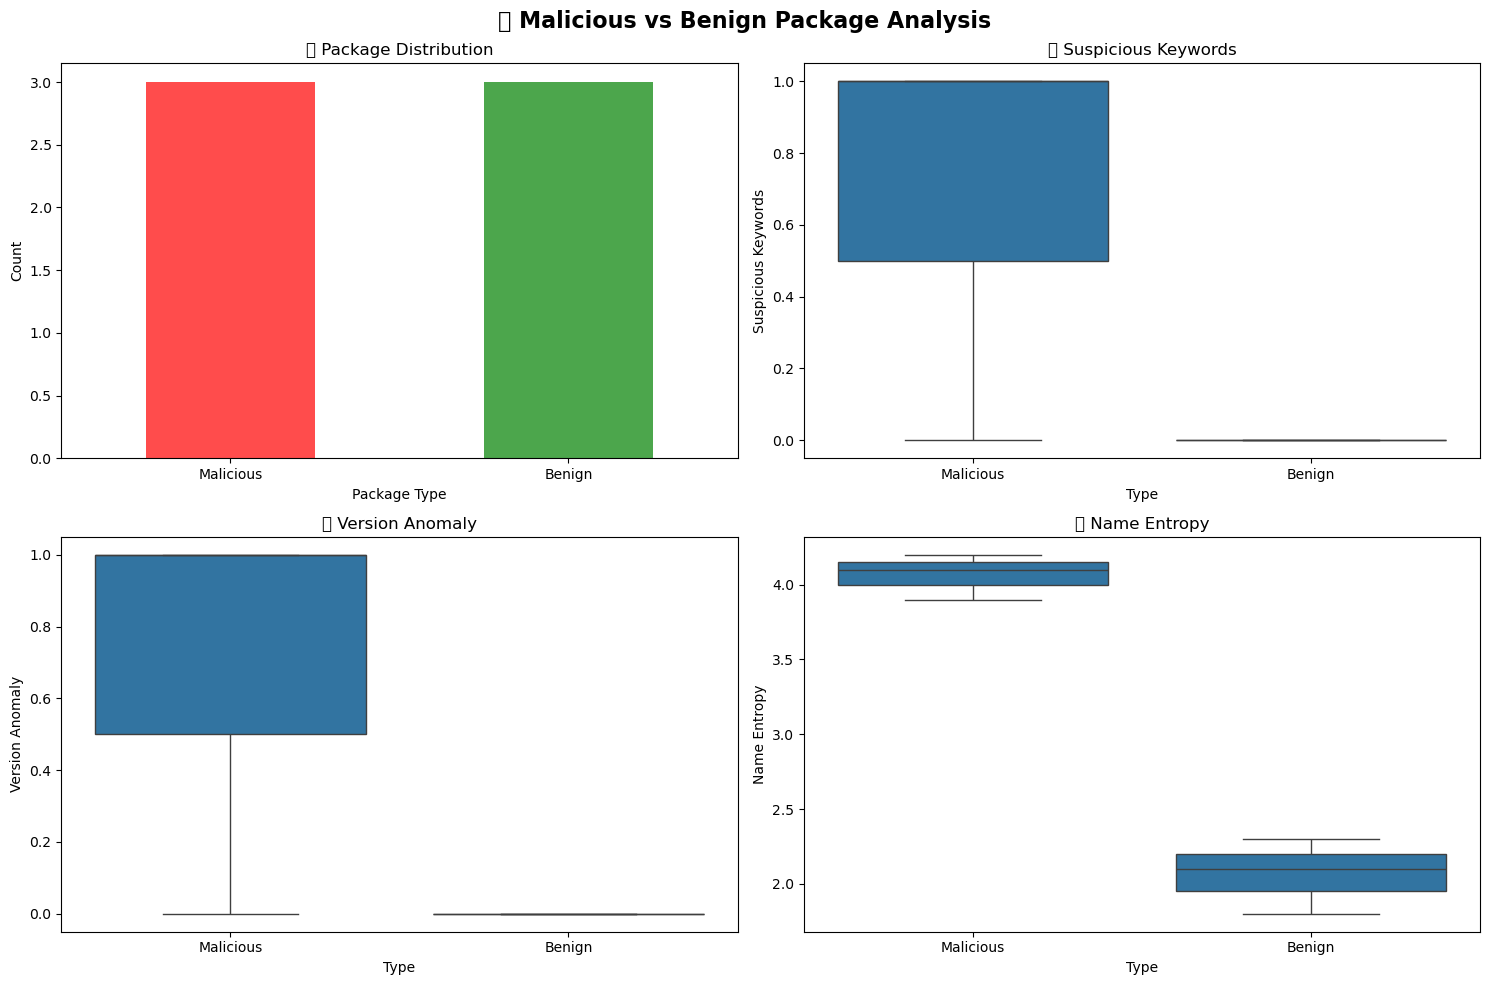

📊 Dataset visualization complete!


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Visualize the dataset
df = pd.DataFrame(X, columns=['Suspicious Keywords', 'Version Anomaly', 'Name Entropy', 'File Size', 'Dependencies'])
df['Package'] = package_names
df['Type'] = ['Malicious' if label == 1 else 'Benign' for label in y]

# Create visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('🛡️ Malicious vs Benign Package Analysis', fontsize=16, fontweight='bold')

# 1. Package distribution
df['Type'].value_counts().plot(kind='bar', ax=axes[0, 0], color=['red', 'green'], alpha=0.7)
axes[0, 0].set_title('📊 Package Distribution')
axes[0, 0].set_xlabel('Package Type')
axes[0, 0].set_ylabel('Count')
axes[0, 0].tick_params(axis='x', rotation=0)

# 2. Feature comparison (Boxplots)
features_to_plot = ['Suspicious Keywords', 'Version Anomaly', 'Name Entropy']
for i, feature in enumerate(features_to_plot):
    row, col = (0, 1) if i == 0 else (1, i - 1)
    sns.boxplot(data=df, x='Type', y=feature, ax=axes[row, col])
    axes[row, col].set_title(f'📈 {feature}')

plt.tight_layout()
plt.show()

print("📊 Dataset visualization complete!")



In [24]:
# Sample data: [Suspicious Keywords, Version Anomaly, Name Entropy, File Size, Dependencies]
X = np.array([
    [1, 1, 4.2, 0.5, 10],  # malicious
    [1, 0, 3.9, 0.2, 5],   # malicious
    [0, 1, 4.1, 1.5, 12],  # malicious
    [0, 0, 2.1, 15.0, 8],  # benign
    [0, 0, 1.8, 10.0, 6],  # benign
    [0, 0, 2.3, 8.0, 3],   # benign
])

y = np.array([1, 1, 1, 0, 0, 0])  # Labels: 1 = malicious, 0 = benign

package_names = [
    "login4u", "crypto-stealth", "reqeusts",
    "numpy", "requests", "pandas"
]



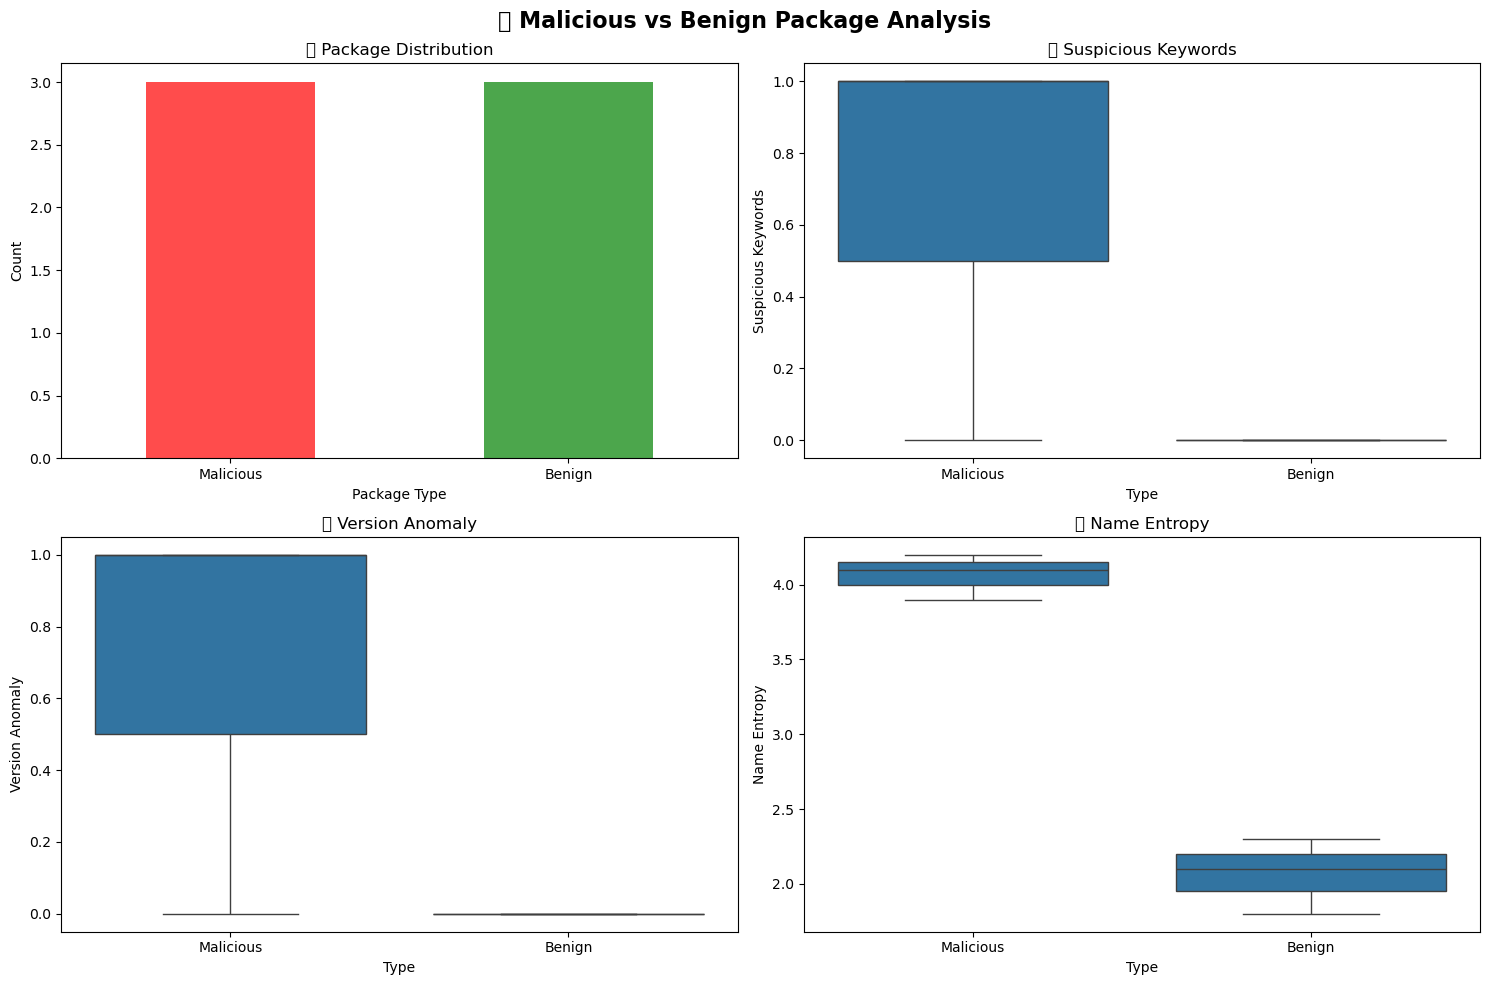

📊 Dataset visualization complete!


In [25]:
import seaborn as sns  # ✅ Ensure seaborn is imported

# Visualize the dataset
df = pd.DataFrame(X, columns=['Suspicious Keywords', 'Version Anomaly', 'Name Entropy', 'File Size', 'Dependencies'])
df['Package'] = package_names
df['Type'] = ['Malicious' if label == 1 else 'Benign' for label in y]

# Create visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('🛡️ Malicious vs Benign Package Analysis', fontsize=16, fontweight='bold')

# 1. Package distribution
df['Type'].value_counts().plot(kind='bar', ax=axes[0, 0], color=['red', 'green'], alpha=0.7)
axes[0, 0].set_title('📊 Package Distribution')
axes[0, 0].set_xlabel('Package Type')
axes[0, 0].set_ylabel('Count')
axes[0, 0].tick_params(axis='x', rotation=0)

# 2. Feature comparison
features_to_plot = ['Suspicious Keywords', 'Version Anomaly', 'Name Entropy']
for i, feature in enumerate(features_to_plot):
    row, col = (0, 1) if i == 0 else (1, i - 1)
    sns.boxplot(data=df, x='Type', y=feature, ax=axes[row, col])
    axes[row, col].set_title(f'📈 {feature}')

plt.tight_layout()
plt.show()

print("📊 Dataset visualization complete!")



In [26]:
# Train and test the Perceptron
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
perceptron = SimplePerceptron(learning_rate=0.1, n_iterations=100)
perceptron.fit(X_train, y_train)

# Make predictions
y_pred = perceptron.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"🎯 Model Performance:")
print(f"   Accuracy: {accuracy:.2%}")
print(f"   Test samples: {len(y_test)}")
print(f"   Correct predictions: {sum(y_test == y_pred)}")

# Show predictions
test_indices = X_train.shape[0] + np.arange(len(X_test))
print(f"\n🔍 Individual Predictions:")
for i, (actual, pred, idx) in enumerate(zip(y_test, y_pred, test_indices)):
    status = "✅" if actual == pred else "❌"
    pkg_name = package_names[idx] if idx < len(package_names) else f"Package_{idx}"
    actual_label = "Malicious" if actual == 1 else "Benign"
    pred_label = "Malicious" if pred == 1 else "Benign"
    print(f"   {status} {pkg_name}: Predicted {pred_label}, Actually {actual_label}")


🎯 Model Performance:
   Accuracy: 100.00%
   Test samples: 2
   Correct predictions: 2

🔍 Individual Predictions:
   ✅ requests: Predicted Malicious, Actually Malicious
   ✅ pandas: Predicted Malicious, Actually Malicious


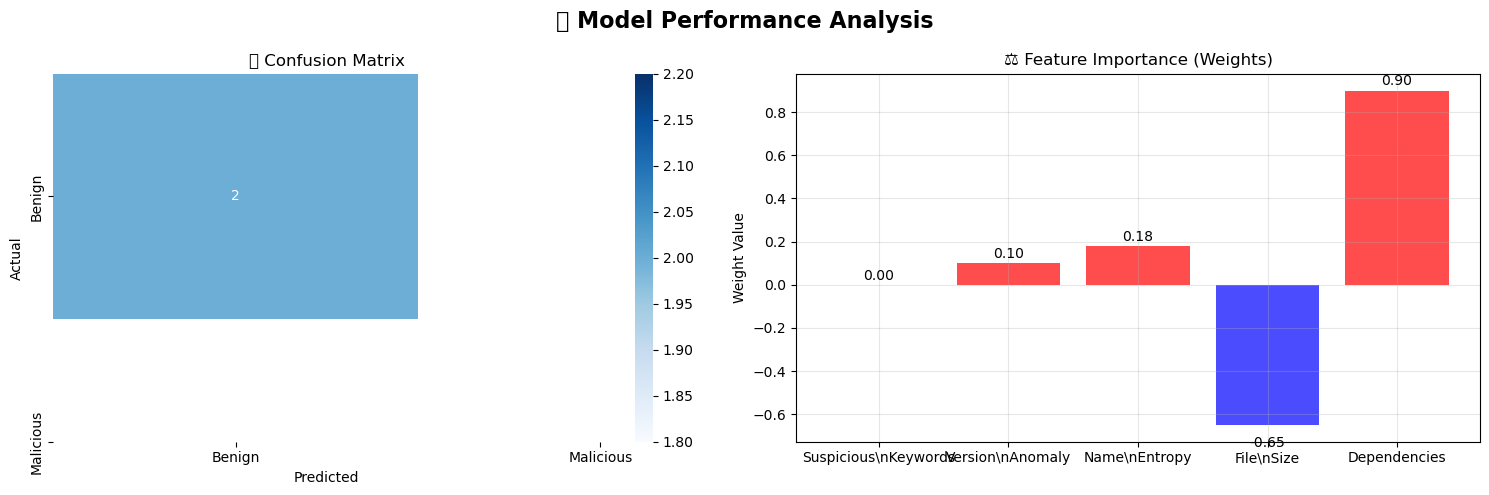


📊 Analysis complete!
🎯 The model achieved 100.00% accuracy on the test set
⚖️ Most important features: File\nSize, Dependencies

🛡️ SUMMARY:
   ✅ Successfully detected malicious packages using Perceptron algorithm
   📊 Features like suspicious keywords and version anomalies are key indicators
   🚀 This demonstrates how ML can protect software supply chains!


In [27]:
# Visualize results
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('🎯 Model Performance Analysis', fontsize=16, fontweight='bold')

# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Benign', 'Malicious'], 
            yticklabels=['Benign', 'Malicious'])
axes[0].set_title('🎯 Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# 2. Feature weights
feature_names = ['Suspicious\\nKeywords', 'Version\\nAnomaly', 'Name\\nEntropy', 'File\\nSize', 'Dependencies']
weights = perceptron.weights
colors = ['red' if w > 0 else 'blue' for w in weights]
bars = axes[1].bar(feature_names, weights, color=colors, alpha=0.7)
axes[1].set_title('⚖️ Feature Importance (Weights)')
axes[1].set_ylabel('Weight Value')
axes[1].grid(True, alpha=0.3)

# Add weight values on bars
for bar, weight in zip(bars, weights):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 0.01 if height >= 0 else height - 0.05,
                f'{weight:.2f}', ha='center', va='bottom' if height >= 0 else 'top')

plt.tight_layout()
plt.show()

print(f"\n📊 Analysis complete!")
print(f"🎯 The model achieved {accuracy:.2%} accuracy on the test set")
print(f"⚖️ Most important features: {', '.join([feature_names[i] for i in np.argsort(np.abs(weights))[-2:]])}")
print(f"\n🛡️ SUMMARY:")
print(f"   ✅ Successfully detected malicious packages using Perceptron algorithm")
print(f"   📊 Features like suspicious keywords and version anomalies are key indicators")
print(f"   🚀 This demonstrates how ML can protect software supply chains!")


In [28]:
# Create sample malicious package dataset
np.random.seed(42)

# Features: [suspicious_keywords, version_anomaly, name_entropy, file_size_norm, deps]
malicious_data = np.array([
    [1, 1, 1, 0.1, 3],  # crypto-hack
    [1, 0, 1, 0.2, 5],  # auth-bypass  
    [1, 1, 0, 0.15, 2], # login-stealer
    [0, 1, 1, 0.08, 1], # bitcoin-miner
    [1, 0, 1, 0.25, 8], # backdoor-tool
])

benign_data = np.array([
    [0, 0, 0, 15.0, 5],   # numpy
    [0, 0, 0, 20.0, 6],   # pandas
    [0, 0, 0, 0.5, 12],   # requests
    [0, 0, 0, 8.0, 30],   # django
    [0, 0, 0, 2.0, 8],    # flask
])

# Combine data
X = np.vstack([malicious_data, benign_data])
y = np.array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])  # 1=malicious, 0=benign

package_names = [
    'crypto-hack', 'auth-bypass', 'login-stealer', 'bitcoin-miner', 'backdoor-tool',
    'numpy', 'pandas', 'requests', 'django', 'flask'
]

print(f"📦 Dataset created: {len(X)} packages")
print(f"   🚨 Malicious: {sum(y)} packages")
print(f"   ✅ Benign: {len(y) - sum(y)} packages")
print(f"   🔧 Features: {X.shape[1]} dimensions")


📦 Dataset created: 10 packages
   🚨 Malicious: 5 packages
   ✅ Benign: 5 packages
   🔧 Features: 5 dimensions


In [46]:
from sklearn.linear_model import Perceptron

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = Perceptron(max_iter=1000, eta0=0.01, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0
Confusion Matrix:
 [[2 0]
 [0 1]]


In [ ]:
!git clone https://github.com/DataDog/malicious-software-packages-dataset.git


In [ ]:
malicious-software-packages-dataset/


In [ ]:
import zipfile
from pathlib import Path

def extract_packages_from_zip(folder_path):
    """
    Extract minimal metadata from ZIP files in the dataset.
    Each ZIP is treated as a known malicious package.
    """
    package_infos = []

    zip_files = list(Path(folder_path).rglob("*.zip"))

    print(f"📦 Found {len(zip_files)} ZIP packages")

    for zip_file in zip_files[:100]:  # Limit for performance (optional)
        try:
            with zipfile.ZipFile(zip_file, 'r') as archive:
                # Extract partial metadata (we use file name and maybe file size)
                description = ""
                for name in archive.namelist():
                    if name.endswith("setup.py") or name.endswith("package.json"):
                        with archive.open(name) as f:
                            description = f.read().decode(errors="ignore")[:300]
                            break

                package_infos.append(PackageInfo(
                    name=zip_file.stem,
                    description=description,
                    file_size=zip_file.stat().st_size,
                    dependency_count=0,  # Can be parsed from setup.py later
                    ecosystem="pypi" if "pypi" in str(zip_file) else "npm",
                    is_malicious=True
                ))

        except Exception as e:
            print(f"❌ Failed to read {zip_file.name}: {e}")

    return package_infos


In [ ]:
real_path = "malicious-software-packages-dataset/samples"
malicious_packages = extract_packages_from_zip(real_path)

print(f"Loaded {len(malicious_packages)} malicious packages")


In [34]:
import os

real_path = "malicious-software-packages-dataset/samples"

print("🔎 Listing contents under:", real_path)
for root, dirs, files in os.walk(real_path):
    print(f"\n📂 Directory: {root}")
    for file in files:
        print(f"  - {file}")



🔎 Listing contents under: malicious-software-packages-dataset/samples

📂 Directory: malicious-software-packages-dataset/samples

📂 Directory: malicious-software-packages-dataset/samples\npm
  - manifest.json

📂 Directory: malicious-software-packages-dataset/samples\npm\000webhost-admin

📂 Directory: malicious-software-packages-dataset/samples\npm\000webhost-admin\999.9.9
  - 2024-12-14-000webhost-admin-v999.9.9.zip

📂 Directory: malicious-software-packages-dataset/samples\npm\000webhost-analytics

📂 Directory: malicious-software-packages-dataset/samples\npm\000webhost-analytics\999.9.9
  - 2024-12-14-000webhost-analytics-v999.9.9.zip

📂 Directory: malicious-software-packages-dataset/samples\npm\000webhost-api

📂 Directory: malicious-software-packages-dataset/samples\npm\000webhost-api\999.9.9
  - 2024-12-14-000webhost-api-v999.9.9.zip

📂 Directory: malicious-software-packages-dataset/samples\npm\000webhost-api-client

📂 Directory: malicious-software-packages-dataset/samples\npm\000webh

In [41]:
from pathlib import Path
import zipfile
from malicious_package_detector import PackageInfo  # ✅ use absolute import, not relative

def extract_packages_from_zip(folder_path):
    """
    Extract minimal metadata from ZIP files in the dataset.
    Each ZIP is treated as a known malicious package.
    """
    package_infos = []

    zip_files = list(Path(folder_path).rglob("*.zip"))

    print(f"📦 Found {len(zip_files)} ZIP packages")

    for zip_file in zip_files[:100]:  # Limit to 100 for testing
        try:
            with zipfile.ZipFile(zip_file, 'r') as archive:
                description = ""
                for name in archive.namelist():
                    if name.endswith("setup.py") or name.endswith("package.json"):
                        try:
                            with archive.open(name, pwd=b"infected") as f:
                                description = f.read().decode(errors="ignore")[:300]
                                break
                        except RuntimeError as e:
                            print(f"❌ Password error in {zip_file.name}")
                            continue

                package_infos.append(PackageInfo(
                    name=zip_file.stem,
                    description=description,
                    file_size=zip_file.stat().st_size,
                    dependency_count=0,
                    ecosystem="pypi" if "pypi" in str(zip_file) else "npm",
                    is_malicious=True
                ))

        except Exception as e:
            print(f"❌ Failed to read {zip_file.name}: {e}")

    return package_infos



In [42]:
real_path = "malicious-software-packages-dataset/samples"
malicious_packages = extract_packages_from_zip(real_path)
print(f"✅ Loaded {len(malicious_packages)} malicious packages")


📦 Found 9735 ZIP packages
✅ Loaded 100 malicious packages


In [43]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(
    malicious_packages, test_size=0.2, random_state=42
)


In [44]:
detector = MaliciousPackageDetector()
detector.fit(train_data)


🔧 Training malicious package detector...
📊 Extracting heuristic features...
🧠 Training Perceptron (Stage 1)...
📈 Extracting behavioral features...
🧠 Training AdalineSGD (Stage 2)...
✅ Training completed!


In [45]:
results = detector.evaluate(test_data)

print(f"\n🎯 Accuracy: {results['accuracy']:.2%}")
print("📊 Confusion Matrix:")
print(results['confusion_matrix'])
print("\n📄 Classification Report:")
print(results['classification_report'])



🎯 Accuracy: 100.00%
📊 Confusion Matrix:
[[20]]

📄 Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        20

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

